<a href="https://colab.research.google.com/github/austinkirwin/public-projects/blob/main/Python_projects/RandomForest/RandomForestModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Learning Random Forest Models

Throughout this notebook I will be learning and applying the concepts of Random Forest Models.

## Learning

In [41]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

### What are the imports for

- **RandomForestClassifier** fits a number of decision trees on subsets of the data
- **accuracy_score** and **precision_score** are used to check how accurate the model is
- **confusion_matrix** and **ConfusionMatrixDisplay** helps see properly labelled responses as well as compare false positives and negatives
- **recall_score** is used to report the proportion of true postives
- **RandomizedSearchCV** is used for hyperparameter tuning
- **train_test_split** for splitting data

Other imports are visualization or helper functions

In [42]:
# Data set
drugs = pd.read_csv("https://raw.githubusercontent.com/austinkirwin/public-projects/refs/heads/main/Python_projects/RandomForest/drug200.csv")
drugs.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [43]:
# Mapping Non-int values to int

drugs['Sex'] = drugs['Sex'].map({'M':1, 'F':0})
drugs['BP'] = drugs['BP'].map({'HIGH':1, 'NORMAL':0, 'LOW':-1}) # Make sure the values being mapped from are exactly as in the data
drugs['Cholesterol'] = drugs['Cholesterol'].map({'HIGH':1, 'NORMAL':0})
drugs.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,1,1,25.355,DrugY
1,47,1,-1,1,13.093,drugC
2,47,1,-1,1,10.114,drugC
3,28,0,0,1,7.798,drugX
4,61,0,-1,1,18.043,DrugY


In [44]:
# Splitting the data
predictors = drugs.drop('Drug', axis =1)
response = drugs['Drug']

X_train, X_test, Y_train, Y_test = train_test_split(predictors, response, test_size = .2)
X_train.head(), Y_train.head()

(    Age  Sex  BP  Cholesterol  Na_to_K
 18   23    1  -1            1    7.298
 70   70    1   1            1   13.967
 88   37    0   1            0   23.091
 5    22    0   0            1    8.607
 28   39    0  -1            0   22.697,
 18    drugC
 70    drugB
 88    DrugY
 5     drugX
 28    DrugY
 Name: Drug, dtype: object)

In [45]:
# Fitting and predicting
forest = RandomForestClassifier()
forest.fit(X_train, Y_train)
Y_pred = forest.predict(X_test)

In [46]:
# Checking accuracy of model
accuracy_score(Y_test, Y_pred)

0.95

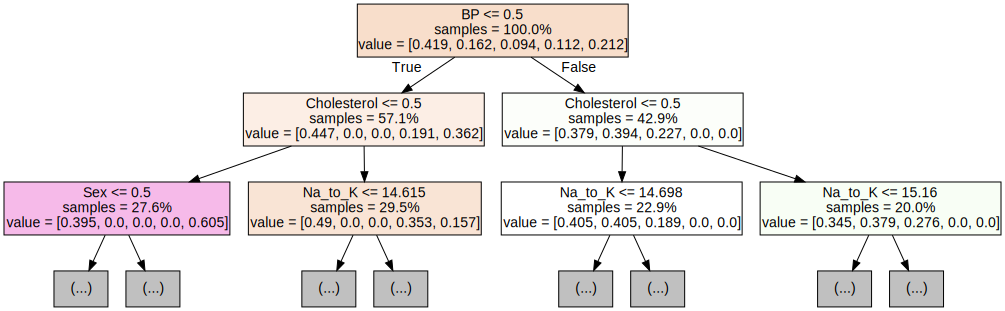

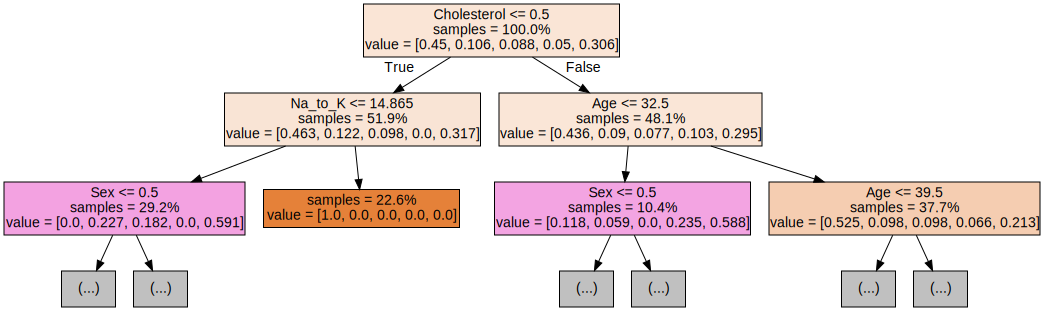

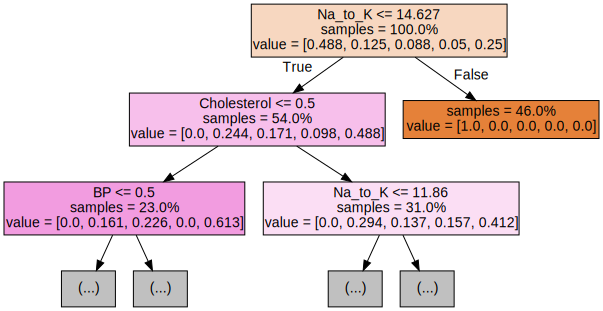

In [47]:
# Visualizing the first 3 trees
for i in range(3):
    tree = forest.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

### Tuning Hyperparameters

- Changing **n_estimators** changes # of decision trees
- Changing **max_depth** changes the depth of the trees

In [48]:
### Tuning

param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
newForest = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(newForest,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7eff92f910d0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7eff93aab050>})

Output the best estimator was and what the associated **max_depth** and **n_estimators** are.

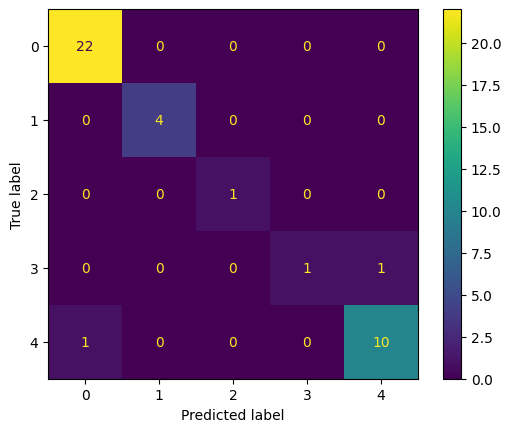

In [49]:
# Predicting with best estimator
bestForest = rand_search.best_estimator_

Y_pred = bestForest.predict(X_test)

# Making Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)
ConfusionMatrixDisplay(cm).plot()

In [56]:
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, average = 'weighted')
recall = recall_score(Y_test, Y_pred, average = 'weighted')
print(accuracy, precision, recall)

0.95 0.951086956521739 0.95
